In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# decision tree function
from decision_region_func import plot_decision_regions

# sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Principal component analysis

In [2]:
df_wine = pd.read_csv("../ch4_BuildingDatasetsAndPreprocessing/wine.data",header=None)

columns_list = columns_list = ['label',
                   'alcohol',
                   'malic acid',
                   'ash',
                   'alcalinity of ash',
                   'magnesium',
                   'total phenols',
                   'flavanoids',
                   'nonflavanoid phenols',
                   'proanthocyanins',
                   'color intensity',
                   'hue',
                   'od280/od315 of diluted wines',
                   'proline']

df_wine.columns = columns_list

df_wine.head(2)

,label,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [3]:
x = df_wine.iloc[:,1:]
y = df_wine.iloc[:,0]

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.3,
                                                 random_state=0,
                                                 stratify=y)

In [5]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [6]:
## extract eigenvalues from the covariance matrix

cov_mat = np.cov(x_train_std.T)  # notice the training data is transposed in the np.cov() command

eigen_vals,eigen_vec = np.linalg.eigh(cov_mat)

print('Eigenvalues \n',eigen_vals)

Eigenvalues 
 [0.10754642 0.15362835 0.1808613  0.21357215 0.3131368  0.34650377
 0.51828472 0.6620634  0.84166161 0.96120438 1.54845825 2.41602459
 4.84274532]


#### total and explained variance

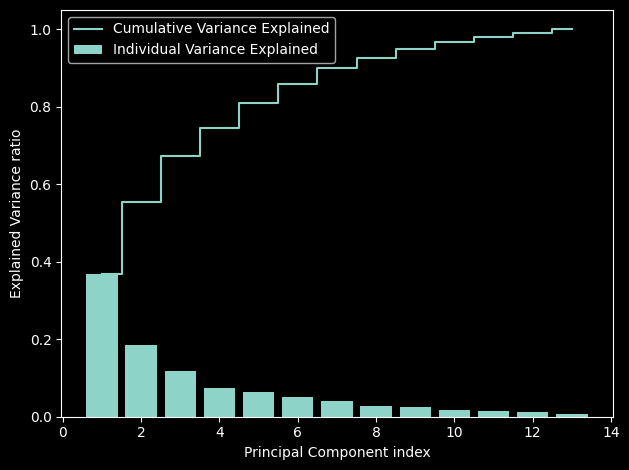

In [7]:
total = sum(eigen_vals)

var_explained = [(i/total) for i in sorted(eigen_vals,reverse=True)]

cum_var_explained = np.cumsum(var_explained)

plt.bar(range(1,14),var_explained,align = 'center',label = 'Individual Variance Explained')
plt.step(range(1,14),cum_var_explained,where='mid',label='Cumulative Variance Explained')
plt.ylabel('Explained Variance ratio')
plt.xlabel('Principal Component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [8]:
#make a list of eigenvalue,eigenvector pairs in a tuple
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vec[:,i]) for i in range(0,len(eigen_vals))]

# sort the pairs from high to low
eigen_pairs.sort(key=lambda k:k[0], reverse=True)

In [9]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
          eigen_pairs[1][1][:,np.newaxis])) # multiplies by -1 here to match the book

w

array([[-0.13724218, -0.50303478],
       [ 0.24724326, -0.16487119],
       [-0.02545159, -0.24456476],
       [ 0.20694508,  0.11352904],
       [-0.15436582, -0.28974518],
       [-0.39376952, -0.05080104],
       [-0.41735106,  0.02287338],
       [ 0.30572896, -0.09048885],
       [-0.30668347, -0.00835233],
       [ 0.07554066, -0.54977581],
       [-0.32613263,  0.20716433],
       [-0.36861022,  0.24902536],
       [-0.29669651, -0.38022942]])

In [10]:
x_train_std[0].dot(w)

array([ 2.38299011, -0.45458499])

In [11]:
# transform the entire x_train_std dataset onto the two principal components using the dot product
# using the first 2 PC's since they are accounting for roughly 60% of the variance (see plot above)

x_train_pca = x_train_std.dot(w)

In [12]:
x_train_pca

array([[ 2.38299011, -0.45458499],
       [-1.96578183, -1.65376939],
       [-2.53907598, -1.02909066],
       [-1.43010776, -0.6024011 ],
       [ 3.14147227, -0.66214979],
       [ 0.50253552,  2.08907131],
       [ 0.04867722,  2.27536044],
       [ 2.47888989,  0.08603318],
       [ 2.01900259,  1.3538719 ],
       [ 0.75156583,  2.55367947],
       [ 0.72268915,  1.18404391],
       [-3.00366211, -0.94626934],
       [ 2.57518878,  1.0697549 ],
       [ 3.73151104, -1.01968876],
       [-1.12276518, -0.13877   ],
       [ 2.85996853, -2.28819559],
       [-0.74717125,  3.21746061],
       [-1.58427878, -0.16048055],
       [ 3.38887101, -2.11550689],
       [ 3.15405473, -0.54233966],
       [-1.28036506,  1.72926871],
       [-1.71438911, -0.71745249],
       [-1.55040291,  1.7580591 ],
       [ 1.10984489,  1.20480693],
       [-0.69108418,  1.71385374],
       [-2.086036  ,  1.68453671],
       [ 2.90393456, -1.95258805],
       [-2.07635784, -1.47183304],
       [-1.74756185,

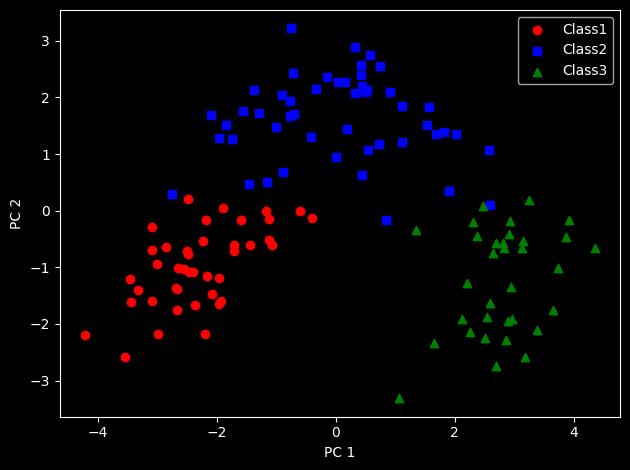

In [13]:
colors = ['red','blue','green']
markers = ['o','s','^']

for L,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(x_train_pca[y_train==L,0],
                x_train_pca[y_train==L,1],
                c=c,label=f'Class{L}',marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# PCA analysis using sklearn (preceeding is manual)

In [14]:
lr = LogisticRegression(multi_class='ovr',
                        solver='lbfgs',
                        random_state=1,
                        C=1.0)  ## NOTE: listing no regularization method does l2 regularization by default

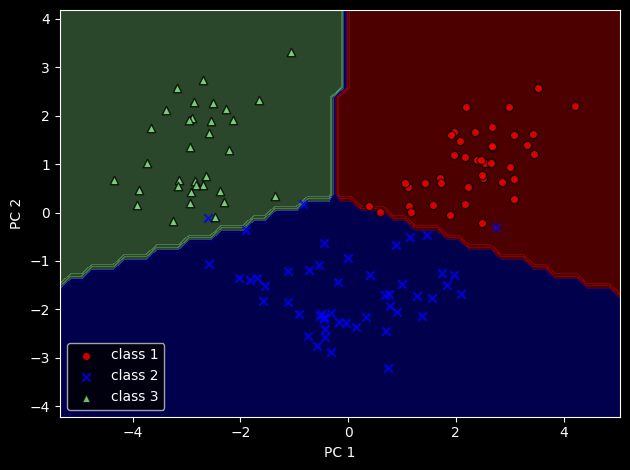

In [15]:
pca = PCA(n_components=2) # using 2 components as found in the manual section

x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.fit_transform(x_test_std)

lr.fit(x_train_pca,y_train)

plot_decision_regions(x_train_pca,y_train,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

##### evaluating the PC features on the test dataset

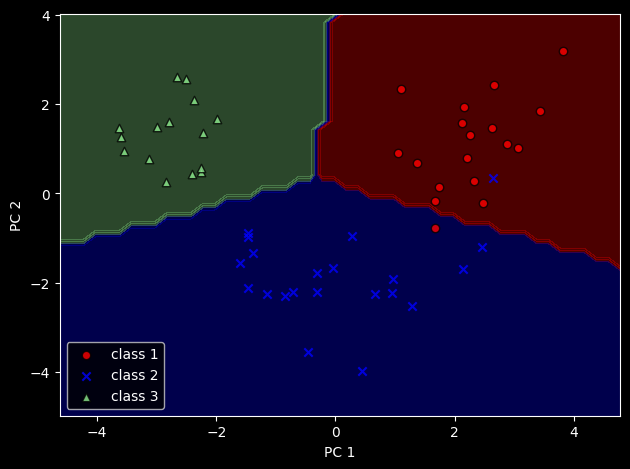

In [16]:
plot_decision_regions(x_test_pca,y_test,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [17]:
predictions = lr.predict(x_test_pca)

print(pd.crosstab(y_test,predictions,
            rownames=['actual'],
            colnames=['predicted'])
    )   
print("---------------------------------------------------------------------")
print(f'Overall Accuracy is:', round(lr.score(x_test_pca,y_test)*100,3),'%')

predicted   1   2   3
actual               
1          17   1   0
2           1  20   0
3           0   0  15
---------------------------------------------------------------------
Overall Accuracy is: 96.296 %


## Explained Variance Ratios

In [18]:
pca_explained = PCA(n_components=None)

x_train_pca_explained = pca_explained.fit_transform(x_train_std)

pca_explained.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

## feature contributions to a certain PC
#### example below uses the first PC

In [19]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

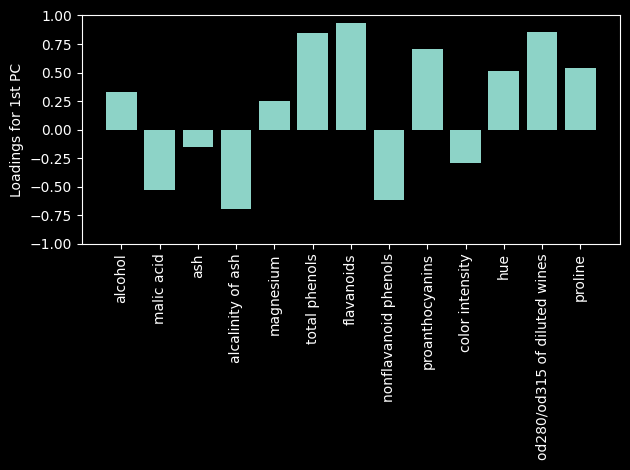

In [20]:
fig,ax = plt.subplots()
ax.bar(range(13), loadings[:,0],align='center')
ax.set_ylabel('Loadings for 1st PC')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1,1])
plt.tight_layout()
plt.show()